# Students' Grade Analysis
<br>This nootebook is used analyze grades from my University.
<br>All grades are from the Faculty of Engineering and Natural Sciences and are from the I cycle (Bachelor)
<br>This analysis is based on grades on a individual student level

Importing standard packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pylab
import scipy.stats as stats

Reading the data

In [4]:
grades = pd.read_csv('data_added_variables.csv')

In [5]:
grades.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
grades[' Grade Coefficient'].unique()

array([nan, 2. , 0. , 3. , 1. , 2.3, 2.7, 3.7, 3.3, 4. ])

In [7]:
grades

,Student ID,Date of Birth,Registration Date,Faculty,Program,Education Level,Semester,Course code,Course name,Credits,Num Grade,Letter Grade,Grade Coefficient,Semester after registration,Program Course,FENS Course
0,140301026,1995-09-19,2014-09-22,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO370,WORK PLACEMENT / INTERNSHIP,3|6,5.0,U,NaN,8,Program course,FENS course
1,140301026,1995-09-19,2014-09-22,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO407,PROTEIN ENGINEERING,3|6,6.0,C,2.0,8,Program course,FENS course
2,140301026,1995-09-19,2014-09-22,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,BIO411,MAMMALIAN PHYSIOLOGY,3|6,5.0,F,0.0,8,Program course,FENS course
3,140301026,1995-09-19,2014-09-22,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,CS306,DATABASE MANAGEMENT,3|6,5.0,F,0.0,8,Non-program course,FENS course
4,140301026,1995-09-19,2014-09-22,Faculty of Engineering and Natural Sciences,Genetics and Bioengineering (Bachelor),I Cycle (Bachelor),2019 Spring,ENS213,PROGRAMMING FOR ENGINEERS (+),3|6,5.0,F,0.0,8,Non-program course,FENS course
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,190302141,1999-09-20,2019-09-30,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,ECON111,INTRO. TO MICROECONOMICS,3|6,5.0,F,0.0,1,Non-program course,Non-FENS course
4491,190302141,1999-09-20,2019-09-30,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,ELIT100,ACADEMIC ENGLISH AND EFFECTIVE COMMUNICATION,3|6,5.0,F,0.0,1,Non-program course,Non-FENS course
4492,190302141,1999-09-20,2019-09-30,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,MATH101,CALCULUS I,3|6,5.0,F,0.0,1,Non-program course,FENS course
4493,190302141,1999-09-20,2019-09-30,Faculty of Engineering and Natural Sciences,Software Engineering (Bachelor),I Cycle (Bachelor),2019 Fall,NS112,UNDERSTANDING SCIENCE AND TECHNOLOGY,1.5|3,6.0,C,2.0,1,Non-program course,FENS course


Removing grades used for internship and Erasmus courses <br>
We do not need them for our analysis

In [8]:
grades_for_coeff = grades.drop(grades[grades[' Grade Coefficient'] < -1].index)
grades_for_coeff.dropna(subset=[' Grade Coefficient'], inplace=True)
grades_for_coeff[' Grade Coefficient'].unique()

array([2. , 0. , 3. , 1. , 2.3, 2.7, 3.7, 3.3, 4. ])

Grouping the data for each student

In [12]:
students = grades_for_coeff.groupby('Student ID')

In [13]:
stud_id = []
program = []
reg_year = []
grade_coef = []
num_grade = []
for student in grades['Student ID'].unique():
    student = students.get_group(student)
    stud_id.append(student['Student ID'].iloc[0])
    program.append(student['Program'].iloc[0])
    reg_year.append(student['Registration Date'].iloc[0][:4])
    grade_coef.append(student.mean()[' Grade Coefficient'])
    num_grade.append(round(student.mean()['Num Grade']))
    

In [14]:
student_grades = pd.DataFrame({
    'Student ID':pd.Series(stud_id),
    'Program' : pd.Series(program),
    'Registration Year': pd.Series(reg_year),
    ' Grade Coefficient': pd.Series(grade_coef),
    'Num Grade': pd.Series(num_grade)
})

In [15]:
student_grades

,Student ID,Program,Registration Year,Grade Coefficient,Num Grade
0,140301026,Genetics and Bioengineering (Bachelor),2014,2.021277,7.0
1,140302031,Architecture (Bachelor),2014,1.189744,6.0
2,140302038,Architecture (Bachelor),2014,1.784848,6.0
3,140302048,Computer Sciences and Engineering (Bachelor),2014,2.038776,7.0
4,140302051,Computer Sciences and Engineering (Bachelor),2014,2.157143,7.0
...,...,...,...,...,...
122,190302102,Software Engineering (Bachelor),2019,3.333333,8.0
123,190302111,Architecture (Bachelor),2019,2.900000,8.0
124,190302123,Software Engineering (Bachelor),2019,2.900000,8.0
125,190302140,Architecture (Bachelor),2019,2.500000,7.0


## Exploratory data analysis

#### Students' grades by program

In [13]:
student_grades.groupby('Program').mean()

,Student ID,Grade Coefficient,Num Grade
Program,,,
Architecture (Bachelor),1.651296e+08,2.500957,7.379310
Computer Sciences and Engineering (Bachelor),1.654372e+08,2.321417,7.054054
Electrical and Electronics Engineering (Bachelor),1.583021e+08,2.709489,7.700000
Genetics and Bioengineering (Bachelor),1.688724e+08,2.341508,7.000000
Industrial Engineering (Bachelor),1.563021e+08,1.811604,6.600000
Mechanical Engineering (Bachelor),1.636354e+08,2.167072,7.111111
Software Engineering (Bachelor),1.750847e+08,2.555743,7.391304


In [18]:
student_grades.groupby('Program').mean()

,Student ID,Grade Coefficient,Num Grade
Program,,,
Architecture (Bachelor),1.651296e+08,2.500957,7.379310
Computer Sciences and Engineering (Bachelor),1.654372e+08,2.321417,7.054054
Electrical and Electronics Engineering (Bachelor),1.583021e+08,2.709489,7.700000
Genetics and Bioengineering (Bachelor),1.688724e+08,2.341508,7.000000
Industrial Engineering (Bachelor),1.563021e+08,1.811604,6.600000
Mechanical Engineering (Bachelor),1.636354e+08,2.167072,7.111111
Software Engineering (Bachelor),1.750847e+08,2.555743,7.391304


In [69]:
pd.options.display.float_format = "{:,.2f}".format

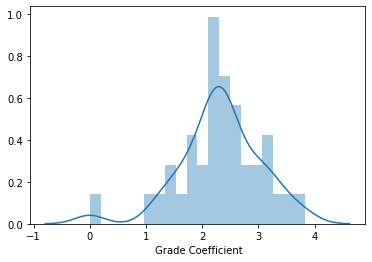

In [74]:
sns.distplot(student_grades[' Grade Coefficient'][student_grades['Program']=='Computer Sciences and Engineering (Bachelor)'], bins=20)

Text(0.5, 0.98, "Distribution of FENS students' grading coefficients with respect to Programs in FENS, and overall distribution of FENS")

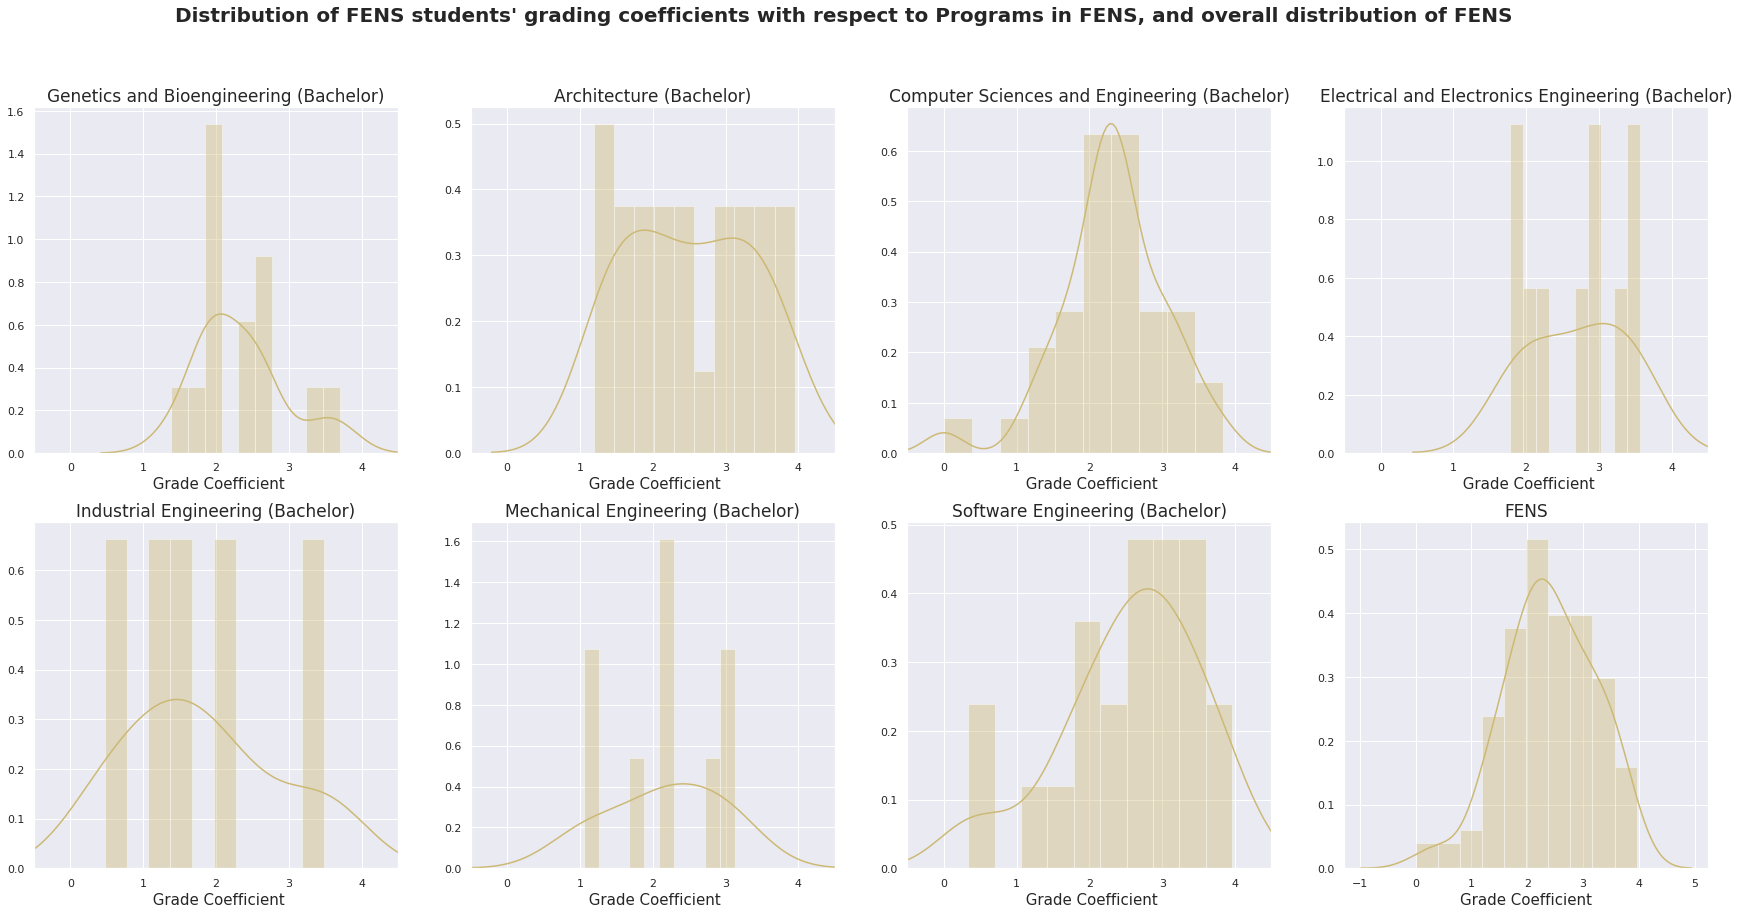

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(30,14))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]]
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.set_color_codes()
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program, fontsize=17)
    axes_position[ind].set_xlabel('Grade Coefficient',fontsize=15)
    axes_position[ind].set_xlim(-0.5,4.5)
    sns.distplot(student_grades[' Grade Coefficient'][student_grades['Program']==program], 
                 ax=axes_position[ind], bins=10, color='y')
sns.distplot(student_grades[' Grade Coefficient'], ax = axes[1,3], bins = 10, color='y')
axes[1, 3].set_title('FENS',fontsize=17)
axes[1,3].set_xlabel('Grade Coefficient',fontsize=15)

#     plt.setp(axes_position[ind].get_xticklabels(), visible = True)
fig.suptitle('Distribution of FENS students\' grading coefficients with respect to Programs in FENS,'+
          ' and overall distribution of FENS', fontsize = 20, fontweight = 'bold')


Text(0.5, 0.98, "Distribution of FENS students' grading coefficients with respect to their year of registration and overall distribution of FENS")

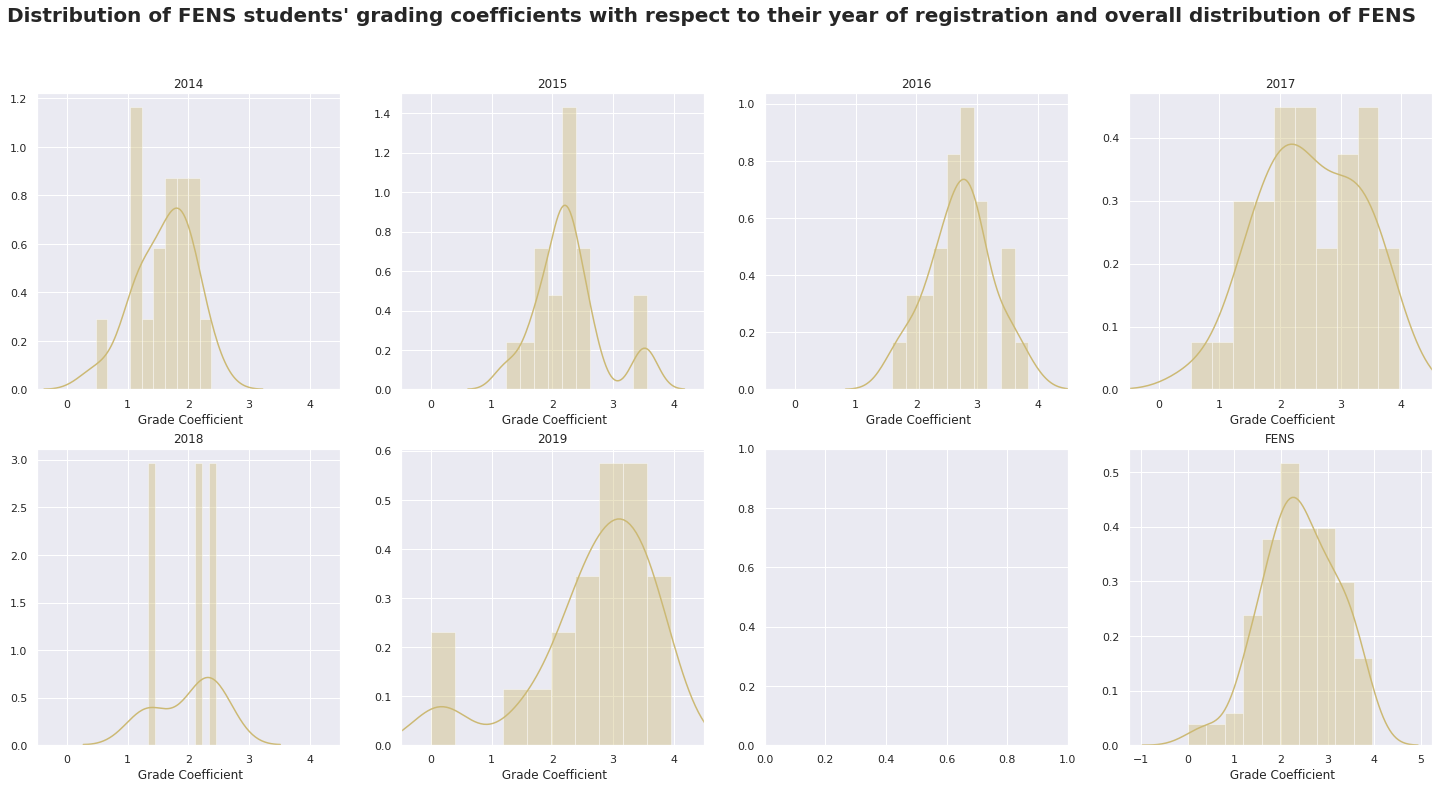

In [88]:
fig, axes = plt.subplots(2, 4, figsize=(25,12))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]]
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.set_color_codes()
for ind,program in enumerate(['2014','2015','2016','2017','2018','2019']):
    axes_position[ind].set_title(program)
    axes_position[ind].set_xlim(-0.5,4.5)
    sns.distplot(student_grades[' Grade Coefficient'][student_grades['Registration Year']==program], 
                 ax=axes_position[ind], bins=10, color='y')
sns.distplot(student_grades[' Grade Coefficient'], ax = axes[1,2], bins = 10, color='y')
axes[1, 2].set_title('FENS')

#     plt.setp(axes_position[ind].get_xticklabels(), visible = True)
fig.suptitle('Distribution of FENS students\' grading coefficients with respect to their year '+
          'of registration and overall distribution of FENS', fontsize = 20, fontweight = 'bold')


In [90]:
student_grades.groupby('Program').mean()

,Student ID,Grade Coefficient,Num Grade
Program,,,
Architecture (Bachelor),"165,129,634.55",2.50,7.38
Computer Sciences and Engineering (Bachelor),"165,437,199.35",2.32,7.05
Electrical and Electronics Engineering (Bachelor),"158,302,057.30",2.71,7.70
Genetics and Bioengineering (Bachelor),"168,872,436.43",2.34,7.00
Industrial Engineering (Bachelor),"156,302,057.60",1.81,6.60
Mechanical Engineering (Bachelor),"163,635,429.22",2.17,7.11
Software Engineering (Bachelor),"175,084,680.30",2.56,7.39


In [17]:
student_grades[' Grade Coefficient'].mean()

2.406613731709456

In [22]:
student_grades['Student ID'].nunique()

127

In [91]:
student_grades.groupby('Program').count()

,Student ID,Registration Year,Grade Coefficient,Num Grade
Program,,,,
Architecture (Bachelor),29,29,29,29
Computer Sciences and Engineering (Bachelor),37,37,37,37
Electrical and Electronics Engineering (Bachelor),10,10,10,10
Genetics and Bioengineering (Bachelor),14,14,14,14
Industrial Engineering (Bachelor),5,5,5,5
Mechanical Engineering (Bachelor),9,9,9,9
Software Engineering (Bachelor),23,23,23,23


#### Testing variance equality

In [21]:
for ind,program in enumerate(sorted(grades['Program'].unique())):
    statistics,p_val = stats.shapiro(student_grades[' Grade Coefficient'][student_grades['Program']==program])
    print(f"{program} has a statistic of {statistics} and  p-value of {p_val}")
    print()

Architecture (Bachelor) has a statistic of 0.9424179196357727 and  p-value of 0.1160142570734024

Computer Sciences and Engineering (Bachelor) has a statistic of 0.9644961357116699 and  p-value of 0.27940064668655396

Electrical and Electronics Engineering (Bachelor) has a statistic of 0.9197427034378052 and  p-value of 0.35481390357017517

Genetics and Bioengineering (Bachelor) has a statistic of 0.9087471961975098 and  p-value of 0.15111906826496124

Industrial Engineering (Bachelor) has a statistic of 0.9793984889984131 and  p-value of 0.9313752055168152

Mechanical Engineering (Bachelor) has a statistic of 0.9026960134506226 and  p-value of 0.2680422365665436

Software Engineering (Bachelor) has a statistic of 0.9468253254890442 and  p-value of 0.25114554166793823



In [92]:
stats.levene(
    student_grades[' Grade Coefficient'][student_grades['Program']=='Architecture (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Computer Sciences and Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Electrical and Electronics Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Genetics and Bioengineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Industrial Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Mechanical Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Software Engineering (Bachelor)']
) 

LeveneResult(statistic=1.0264845270701073, pvalue=0.4115092589783291)

In [93]:
stats.f_oneway(
    student_grades[' Grade Coefficient'][student_grades['Program']=='Architecture (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Computer Sciences and Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Electrical and Electronics Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Genetics and Bioengineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Industrial Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Mechanical Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Software Engineering (Bachelor)']
)

F_onewayResult(statistic=1.0841179443670632, pvalue=0.3758419201966489)

In [94]:
stats.kruskal(
    student_grades[' Grade Coefficient'][student_grades['Program']=='Architecture (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Computer Sciences and Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Electrical and Electronics Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Genetics and Bioengineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Industrial Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Mechanical Engineering (Bachelor)'],
    student_grades[' Grade Coefficient'][student_grades['Program']=='Software Engineering (Bachelor)']
)

KruskalResult(statistic=6.1429512962336394, pvalue=0.4073687455979424)

In [16]:
stud_id = []
program = []
reg_year = []
grade_coef = []
num_grade = []
semester_grades = pd.DataFrame()
for student in grades['Student ID'].unique():
    student = students.get_group(student)
    semester_student = student.groupby('Semester after registration').mean().reset_index()[['Semester after registration',' Grade Coefficient']]
    semester_student['Program'] = student['Program'].iloc[0]
    semester_student.drop(semester_student[semester_student['Semester after registration']==99].index,inplace=True)
    semester_grades = semester_grades.append(semester_student)

#### Students' grades by semesters passed since registration

In [25]:
semester_grades

,Semester after registration,Grade Coefficient,Program
0,1,3.400000,Genetics and Bioengineering (Bachelor)
1,2,3.250000,Genetics and Bioengineering (Bachelor)
2,3,3.150000,Genetics and Bioengineering (Bachelor)
3,4,2.175000,Genetics and Bioengineering (Bachelor)
4,5,1.200000,Genetics and Bioengineering (Bachelor)
...,...,...,...
0,1,3.333333,Software Engineering (Bachelor)
0,1,2.900000,Architecture (Bachelor)
0,1,2.900000,Software Engineering (Bachelor)
0,1,2.500000,Architecture (Bachelor)


In [18]:
semester_grades[' Grade Coefficient'].mean()

2.2355560307955513

In [19]:
semester_grades[' Grade Coefficient'].std()

0.9782791094670948

In [112]:
semester_grades

,Semester after registration,Grade Coefficient,Program
0,1,3.40,Genetics and Bioengineering (Bachelor)
1,2,3.25,Genetics and Bioengineering (Bachelor)
2,3,3.15,Genetics and Bioengineering (Bachelor)
3,4,2.17,Genetics and Bioengineering (Bachelor)
4,5,1.20,Genetics and Bioengineering (Bachelor)
...,...,...,...
0,1,3.33,Software Engineering (Bachelor)
0,1,2.90,Architecture (Bachelor)
0,1,2.90,Software Engineering (Bachelor)
0,1,2.50,Architecture (Bachelor)


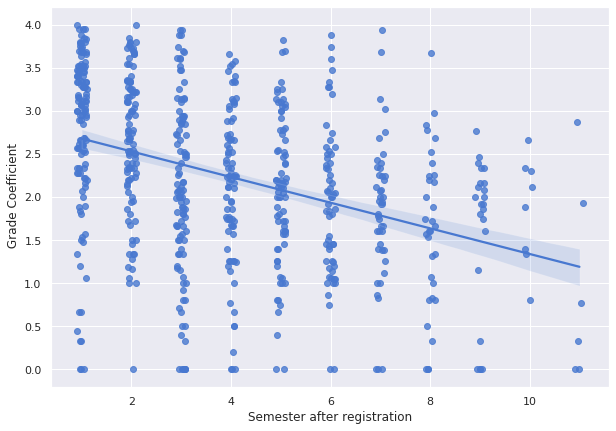

In [122]:
fig = plt.figure(figsize=(10,7), linewidth=10)
sns.set_style('darkgrid')
ax = sns.regplot(x='Semester after registration', y=' Grade Coefficient', 
                     data=semester_grades, x_jitter=.1)

Text(0.5, 0.98, "Regression plots of students' IUS grade coefficient with respect \nto the number of semesters passed after initial registration grouped by Programs in FENS and for FENS overall")

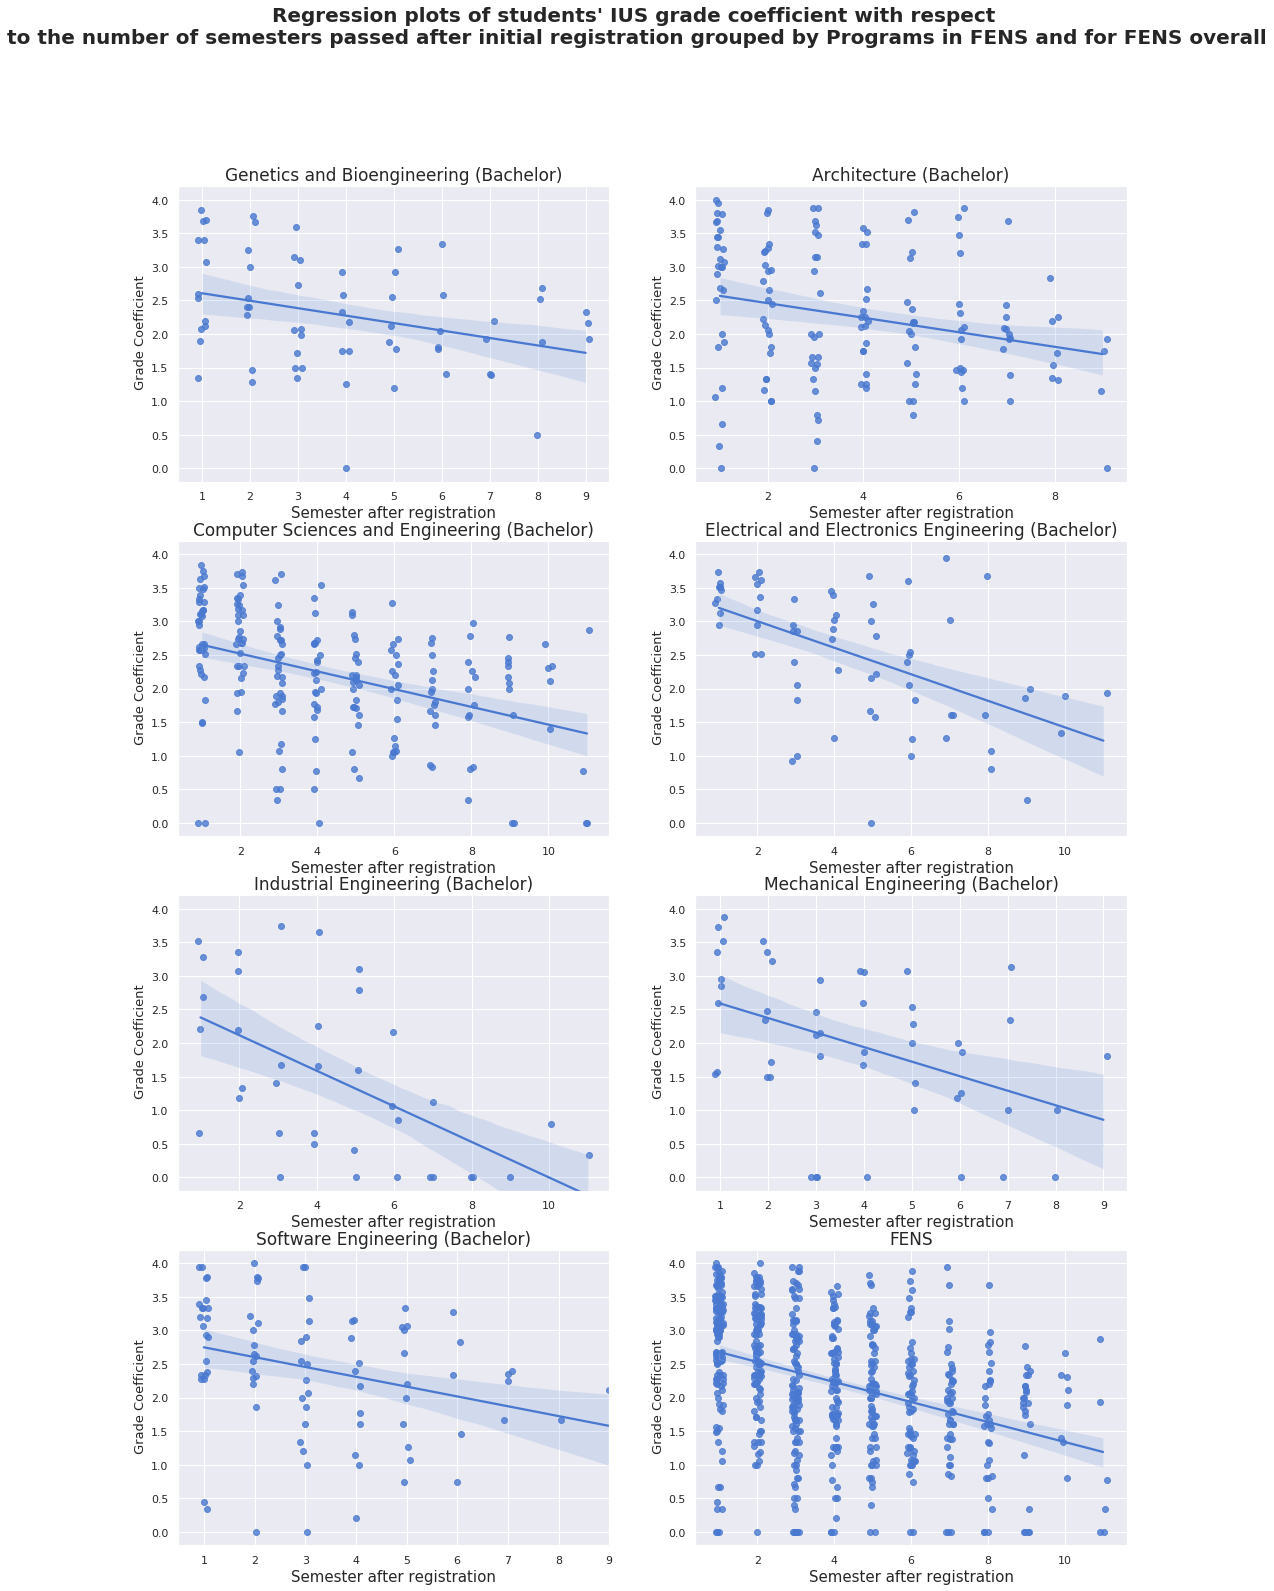

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(17,25))
axes_position = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2, 1], axes[3, 0]] 
custom_palette = sns.color_palette("Paired", 9)
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program, fontsize=17)
    axes_position[ind].set_ylim(-0.2,4.2)
    axes_position[ind].set_xlabel('Semester after registration', fontsize=15)
    axes_position[ind].set_ylabel(' Grade Coefficient', fontsize=13)
    sns.set_style('darkgrid')
    sns.regplot(x='Semester after registration', y=' Grade Coefficient', 
                     data=semester_grades[semester_grades['Program']==program],
                        x_jitter=.1, ax=axes_position[ind])

sns.regplot(x='Semester after registration', y=' Grade Coefficient', 
                     data=semester_grades, x_jitter=.1, ax=axes[3,1])
axes[3, 1].set_title('FENS', fontsize=17)
axes[3,1].set_xlabel('Semester after registration', fontsize=15)
axes[3,1].set_ylabel(' Grade Coefficient', fontsize=13)
axes[3, 1].set_ylim(-0.2,4.2)
fig.suptitle('Regression plots of students\' IUS grade coefficient with respect \nto the number of semesters'+
             ' passed after initial registration grouped by Programs in FENS'+
          ' and for FENS overall', fontsize = 20, fontweight = 'bold')


In [32]:
semester_grades

,Semester after registration,Grade Coefficient,Program
0,1,3.400000,Genetics and Bioengineering (Bachelor)
1,2,3.250000,Genetics and Bioengineering (Bachelor)
2,3,3.150000,Genetics and Bioengineering (Bachelor)
3,4,2.175000,Genetics and Bioengineering (Bachelor)
4,5,1.200000,Genetics and Bioengineering (Bachelor)
...,...,...,...
0,1,3.333333,Software Engineering (Bachelor)
0,1,2.900000,Architecture (Bachelor)
0,1,2.900000,Software Engineering (Bachelor)
0,1,2.500000,Architecture (Bachelor)


Text(0.5, 0.98, "Regression plots of students' IUS grade coefficient with respect \nto the number of semesters passed after initial registration grouped by Programs in FENS and for FENS overall")

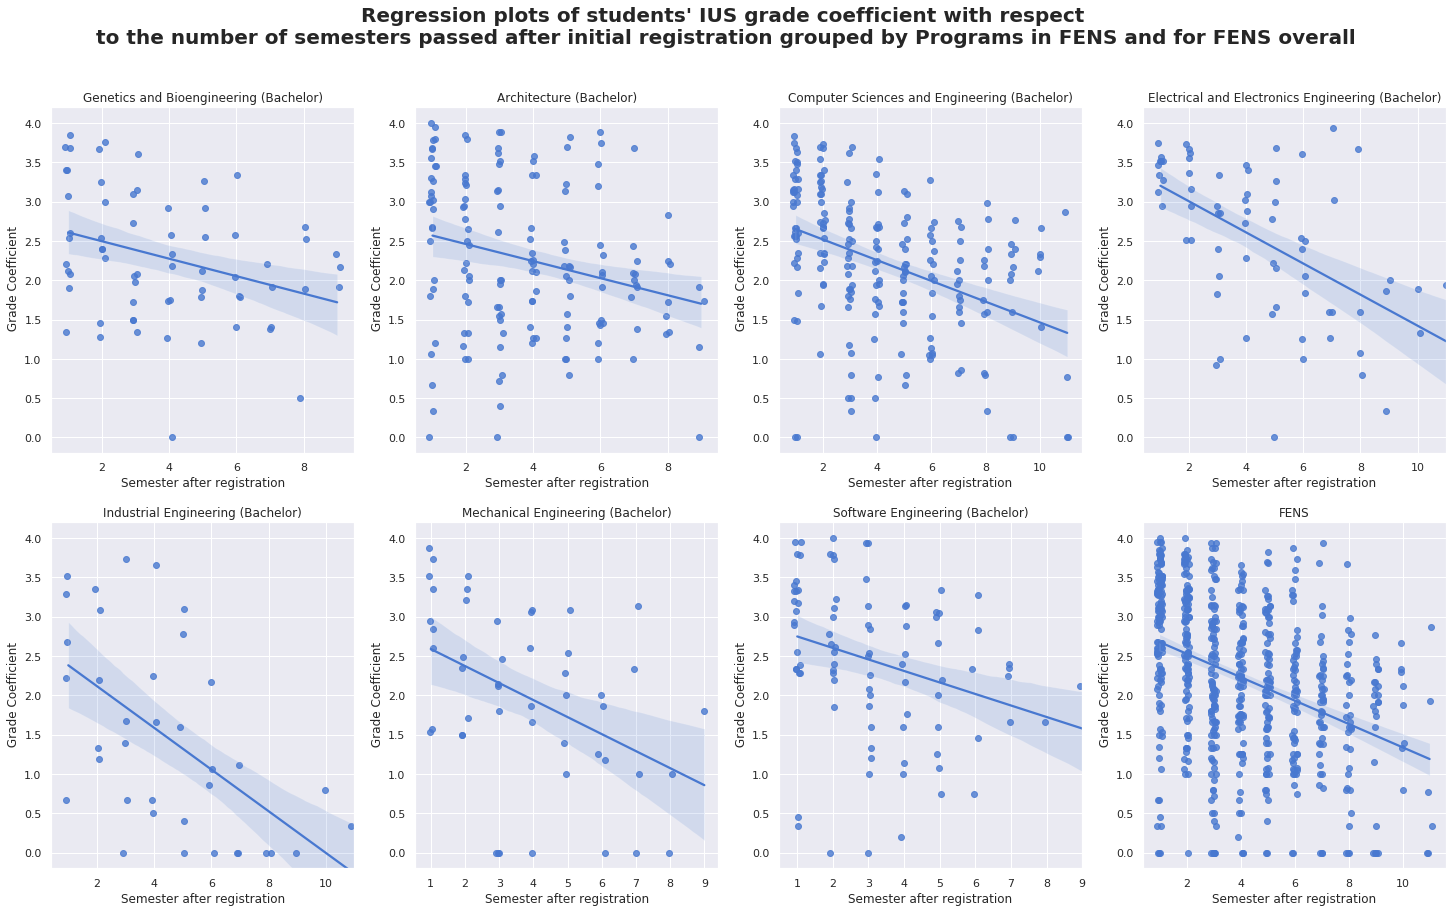

In [133]:
fig, axes = plt.subplots(2, 4, figsize=(25,14))
axes_position = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2]] 
custom_palette = sns.color_palette("Paired", 9)
for ind,program in enumerate(grades['Program'].unique()):
    axes_position[ind].set_title(program)
    axes_position[ind].set_ylim(-0.2,4.2)
    sns.set_style('darkgrid')
    sns.regplot(x='Semester after registration', y=' Grade Coefficient', 
                     data=semester_grades[semester_grades['Program']==program],
                        x_jitter=.1, ax=axes_position[ind])

sns.regplot(x='Semester after registration', y=' Grade Coefficient', 
                     data=semester_grades, x_jitter=.1, ax=axes[1,3])
axes[1, 3].set_title('FENS')
axes[1, 3].set_ylim(-0.2,4.2)
fig.suptitle('Regression plots of students\' IUS grade coefficient with respect \nto the number of semesters'+
             ' passed after initial registration grouped by Programs in FENS'+
          ' and for FENS overall', fontsize = 20, fontweight = 'bold')


###### Checking relation between students' grades and semesters passed since registration

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [142]:
X = semester_grades['Semester after registration'].values.reshape(-1,1)
y = semester_grades[' Grade Coefficient'].values.reshape(-1,1)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state=0)

In [144]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
print(regressor.intercept_)
print(regressor.coef_)

[2.56265445]
[[-0.10933423]]


In [146]:
y_pred = regressor.predict(x_test)

In [147]:
df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

In [148]:
df

,Actual,Predicted
0,2.54,2.34
1,2.68,2.45
2,1.43,1.91
3,3.06,2.13
4,0.50,2.13
...,...,...
463,3.54,2.13
464,2.65,2.34
465,2.85,2.23
466,3.67,2.34


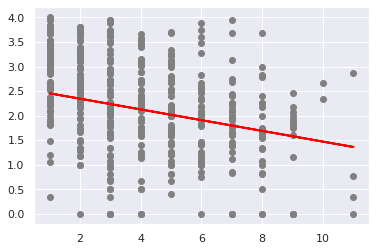

In [150]:
plt.scatter(x_test,y_test, color = 'gray')
plt.plot(x_test,y_pred,color='red', linewidth=2)
plt.show()

In [151]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7325507651366244
Mean Squared Error: 0.8179891910147814
Root Mean Squared Error: 0.9044275487924842


In [208]:
from scipy.stats import pearsonr, spearmanr
pearsonr(semester_grades['Semester after registration'],semester_grades[' Grade Coefficient'])

(-0.37421067464166713, 1.2455113967229028e-23)

In [209]:
spearmanr(semester_grades['Semester after registration'],semester_grades[' Grade Coefficient'])

SpearmanrResult(correlation=-0.40436892889736176, pvalue=1.1447137172968213e-27)

In [153]:
semester_grades[[' Grade Coefficient','Semester after registration']].corr()

,Grade Coefficient,Semester after registration
Grade Coefficient,1.00,-0.37
Semester after registration,-0.37,1.00


'Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
Low degree: When the value lies below + .29, then it is said to be a small correlation.
No correlation: When the value is zero.'

#### Students' grades in first four semesters by year of registration (generation)

In [35]:
first_semester_grades = pd.DataFrame()
for student in grades['Student ID'].unique():
    student = students.get_group(student)
    if len(student.groupby('Semester after registration').mean())>3:
        test_df = student.groupby('Semester after registration').mean().iloc[:3]
        semester_student = pd.DataFrame()
        semester_student = student[['Program']].iloc[:1,:]
        semester_student['Grade'] = test_df[' Grade Coefficient'].sum()/3
        print(test_df[' Grade Coefficient'].sum()/5)
        semester_student['Registration year'] = student['Registration Date'].iloc[0][:4]
        first_semester_grades = first_semester_grades.append(semester_student)
        

1.9600000000000002
0.49333333333333335
1.0266666666666666
1.5933333333333333
1.6960000000000002
1.814
1.7185714285714286
1.67
0.5038095238095238
0.5233333333333333
1.0066666666666666
0.41
1.278
1.528
1.2066666666666666
0.608
0.6133333333333333
1.1199999999999999
1.1966666666666668
2.052
1.752
1.446333333333333
1.1903333333333335
1.1906666666666665
2.0246666666666666
1.6886666666666668
1.2266666666666666
2.136
1.1795238095238094
1.614
1.375
1.7229999999999996
1.5596666666666665
1.8693333333333335
1.5556666666666665
0.9766666666666666
2.2233333333333336
1.2133333333333334
1.816
1.173
1.6130000000000002
1.9720000000000002
0.9899999999999999
1.8780000000000001
2.346
1.9513333333333331
1.5716666666666668
1.8933333333333333
1.6076666666666668
1.5733333333333335
2.0626666666666664
2.2126666666666663
2.09
1.4466666666666665
2.028
1.8986666666666665
1.8986666666666665
1.4226666666666667
1.6493333333333333
1.3980000000000001
1.6460000000000001
1.9266666666666665
1.2916666666666665
2.121333333333

In [34]:
first_semester_grades.groupby('Registration year').mean()

,Grade
Registration year,
2014,1.923122
2015,2.570079
2016,2.916795
2017,2.418651


In [186]:
first_semester_grades

,Program,Grade,Registration year
1,Genetics and Bioengineering (Bachelor),3.27,2014
61,Architecture (Bachelor),0.82,2014
111,Architecture (Bachelor),1.71,2014
154,Computer Sciences and Engineering (Bachelor),2.66,2014
209,Computer Sciences and Engineering (Bachelor),2.83,2014
...,...,...,...
3571,Software Engineering (Bachelor),2.03,2017
3601,Software Engineering (Bachelor),2.28,2017
3636,Software Engineering (Bachelor),0.15,2017
3669,Computer Sciences and Engineering (Bachelor),2.27,2017


Text(0.5, 1.0, "Boxplots of average Grade coefficient for FENS students' first four semesters \n grouped by year of registration ")

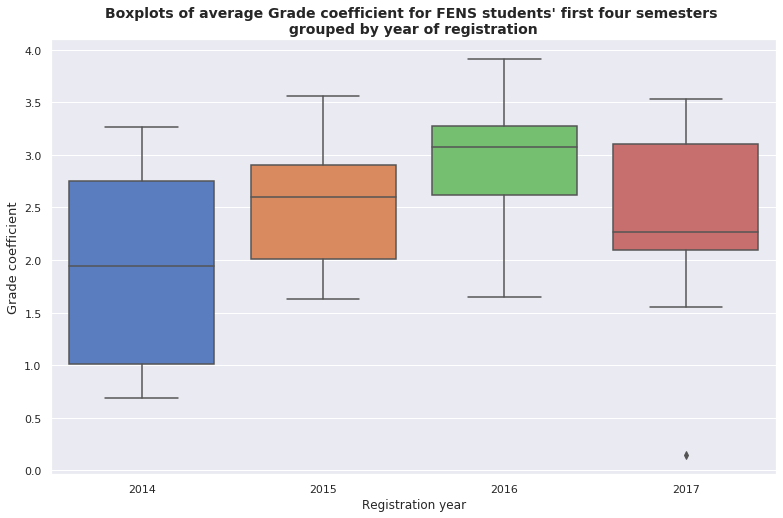

In [202]:
fig = plt.figure(figsize=(13,8))
ax = sns.boxplot(y='Grade', x='Registration year',
                     data=first_semester_grades)
ax.set_ylabel('Grade coefficient', fontsize=13)
ax.set_title('Boxplots of average Grade coefficient for FENS students\' first four semesters \n grouped by year of registration ',fontsize=14, fontweight='bold')

#### Testing variance equality

In [41]:
for ind,year in enumerate(['2014','2015','2016','2017']):
    statiscsd, p_val = stats.shapiro(first_semester_grades['Grade'][first_semester_grades['Registration year']==year])
    print(f"{year} has a statistic of {statiscsd} and  a p-value of {p_val}")
    print(f"the degree of freedom is {len(first_semester_grades['Grade'][first_semester_grades['Registration year']==year])-1}")

2014 has a statistic of 0.9081370830535889 and  a p-value of 0.07977292686700821
the degree of freedom is 17
2015 has a statistic of 0.9509607553482056 and  a p-value of 0.4402869641780853
the degree of freedom is 17
2016 has a statistic of 0.971901535987854 and  a p-value of 0.6730749607086182
the degree of freedom is 25
2017 has a statistic of 0.9191479086875916 and  a p-value of 0.1091369241476059
the degree of freedom is 18


In [205]:
stats.levene(first_semester_grades['Grade'][first_semester_grades['Registration year']=='2014'],
             first_semester_grades['Grade'][first_semester_grades['Registration year']=='2015'],
             first_semester_grades['Grade'][first_semester_grades['Registration year']=='2016'],
            first_semester_grades['Grade'][first_semester_grades['Registration year']=='2017'])

LeveneResult(statistic=2.240556891663845, pvalue=0.0902302871434508)

In [206]:
stats.f_oneway(first_semester_grades['Grade'][first_semester_grades['Registration year']=='2014'],
             first_semester_grades['Grade'][first_semester_grades['Registration year']=='2015'],
             first_semester_grades['Grade'][first_semester_grades['Registration year']=='2016'],
            first_semester_grades['Grade'][first_semester_grades['Registration year']=='2017'])

F_onewayResult(statistic=6.855609964021992, pvalue=0.00037357000497657627)

In [207]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(first_semester_grades['Grade'],first_semester_grades['Registration year'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
2014,2015,-2.6105,0.0134,0.0801,False
2014,2016,-4.5441,0.0,0.0003,True
2014,2017,-1.7347,0.0916,0.5495,False
2015,2016,-1.9771,0.0546,0.3277,False
2015,2017,0.6286,0.5337,1.0,False
2016,2017,2.3427,0.0238,0.143,False
